# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [2]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




**Sua justificativa aqui**
De acordo com as informações o teste é bilateral pois não há evidencias suficientes para afirmar que existe diferença significativa entre as médias

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [3]:
#Seu código aqui
#Imprimindo as médias
media_estrategia_a = amostra_estrategia_A.mean()
media_estrategia_b = amostra_estrategia_B.mean()

print(media_estrategia_a, media_estrategia_b)

71.40559272313098 74.74868110507046


In [4]:
# Imprimindo as variancias
var_estrategia_a = amostra_estrategia_A.var(ddof=1)
var_estrategia_b = amostra_estrategia_B.var(ddof=1)

print(var_estrategia_a,var_estrategia_b)

129.2654943565623 110.4700206552835


**Podemos ver que a média do grupo B é maior do que a do grupo A mas a variancia do grupo A é maior que a do grupo B**

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [13]:
#Seu código aqui
# Tamanho das amostras
n = len(amostra_estrategia_A)

# Calcular a estatística de teste Z com a formula:
z_statistic = (media_estrategia_a - media_estrategia_b) / ((var_estrategia_a/n + var_estrategia_b/n)**0.5)
#Nessa linha nós escrevemos a formula do Z vista em aula

# Calcular o p-valor (unilateral)
p_valor = 1 - stats.norm.cdf(z_statistic)

# Imprimir os resultados
print("Estatística de teste Z:", z_statistic)
print("p-valor:", p_valor)

# Comparar o p-valor com o nível de significância
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rejeitamos a hipótese nula: há uma diferença significativa entre as medias das duas estrategias.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para concluir que há uma diferença significativa entre as as medias das duas estrategias.")

Estatística de teste Z: -1.5267455833477102
p-valor: 0.9365878561381831
Não rejeitamos a hipótese nula: não há evidências suficientes para concluir que há uma diferença significativa entre as as medias das duas estrategias.


# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

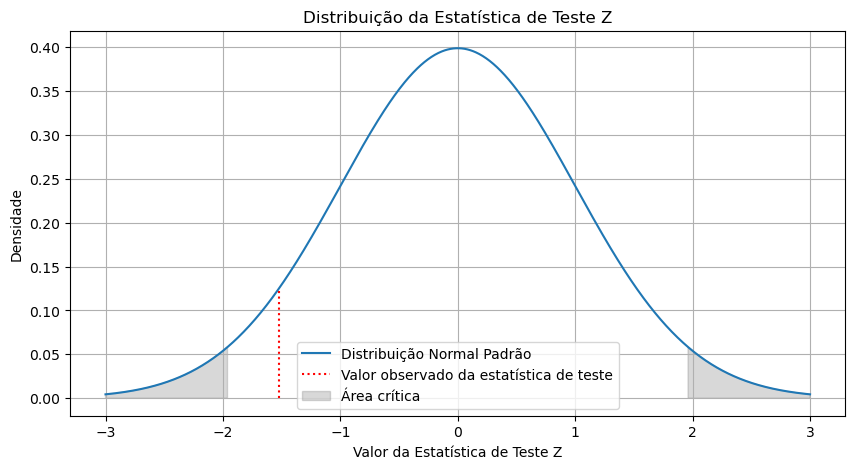

In [9]:
#Seu código aqui

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Valores de X e Y para plotar a distribuição
x = np.linspace(-3, 3, 1000)

y = stats.norm.pdf(x, 0, 1)


# Plotando a distribuição normal padrão
ax.plot(x, y, label='Distribuição Normal Padrão')

# Marcação do valor observado da estatística do teste
ax.vlines(x=[z_statistic], ymin=0, ymax=stats.norm.pdf(z_statistic, 0, 1),
          colors='r', linestyles='dotted', label='Valor observado da estatística de teste')

# Área crítica
critical_region = stats.norm.ppf(0.025), stats.norm.ppf(0.975)
ax.fill_between(x, y, where=(x < critical_region[0]) | (x > critical_region[1]), color='gray', alpha=0.3, label='Área crítica')

# Legenda e rótulos
plt.legend()
plt.xlabel('Valor da Estatística de Teste Z')
plt.ylabel('Densidade')
plt.title('Distribuição da Estatística de Teste Z')
plt.grid(True)

# Exibindo o gráfico
plt.show()

**Vemos que por ser bilateral temos duas áreas criticas mas como não rejeitamos a hipótese nula o nosso p value está fora delas**